In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('behavior.csv')

In [3]:
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['hour'].astype(int)
data['datetime'] = data['time'] + pd.to_timedelta(data['hour'], unit='h')
data['date'] = data['datetime'].dt.date

In [4]:
first_occurrence = data.groupby('user_id')['date'].min().reset_index()
first_occurrence.columns = ['user_id', 'first_date']
first_occurrence

,user_id,first_date
0,3443267,2024-01-12
1,3443283,2024-01-14
2,3443299,2024-01-14
3,3443315,2024-01-12
4,3443331,2024-01-10
...,...,...
49995,4243187,2024-01-12
49996,4243203,2024-01-08
49997,4243219,2024-01-17
49998,4243235,2024-01-10


In [5]:
daily_acquisition = first_occurrence['first_date'].value_counts().sort_index()
daily_acquisition

first_date
2024-01-08    6877
2024-01-09    6454
2024-01-10    5655
2024-01-11    5334
2024-01-12    4852
2024-01-13    4447
2024-01-14    3878
2024-01-15    3579
2024-01-16    3260
2024-01-17    3007
2024-01-18    2657
Name: count, dtype: int64

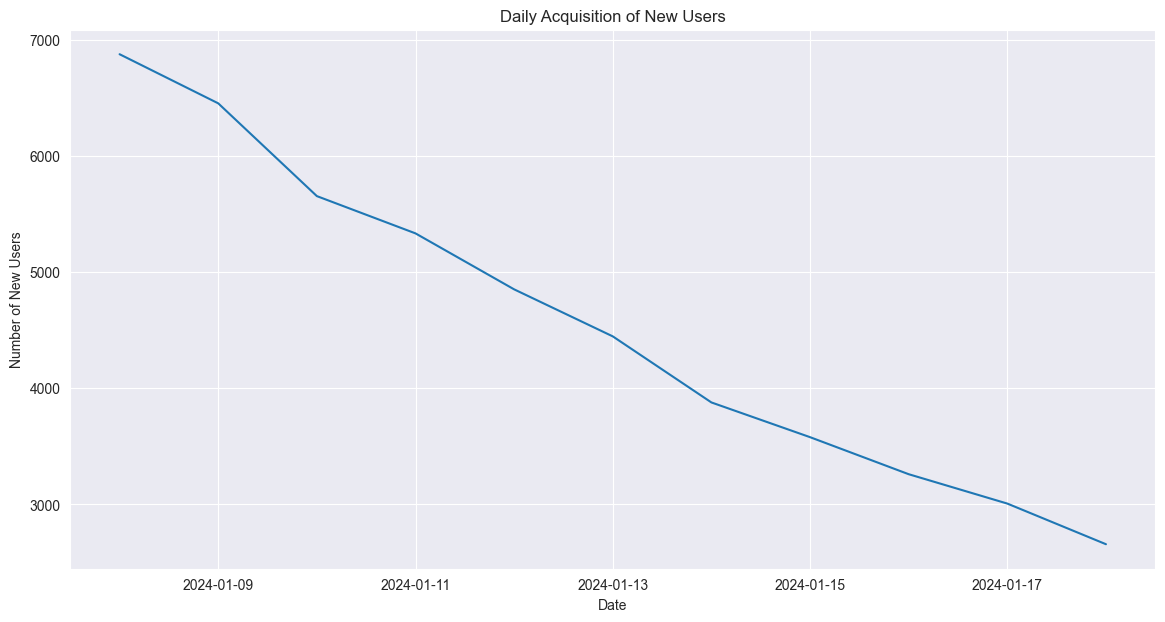

In [6]:
plt.figure(figsize=(14, 7))
daily_acquisition.plot(kind='line')
plt.title('Daily Acquisition of New Users')
plt.xlabel('Date')
plt.ylabel('Number of New Users')
plt.show()

In [7]:
activation_data = data.merge(first_occurrence, on='user_id')
activation_data = activation_data[activation_data['date'] == activation_data['first_date']]
daily_activation = activation_data.groupby('date')['user_id'].nunique()

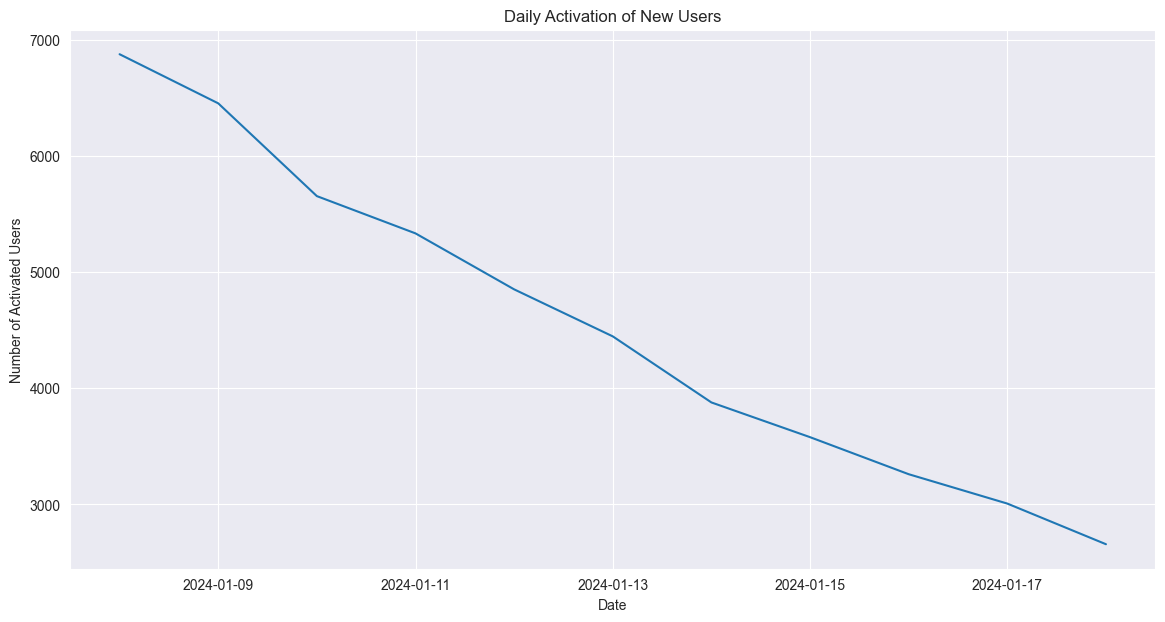

In [8]:
plt.figure(figsize=(14, 7))
daily_activation.plot(kind='line')
plt.title('Daily Activation of New Users')
plt.xlabel('Date')
plt.ylabel('Number of Activated Users')
plt.show()

In [10]:
retention_data = data.merge(first_occurrence, on='user_id')
retention_data['date'] = pd.to_datetime(retention_data['date'])
retention_data['first_date'] = pd.to_datetime(retention_data['first_date'])
retention_data['days_since_first'] = (retention_data['date'] - retention_data['first_date']).dt.days
retention_matrix = retention_data.pivot_table(index='first_date', columns='days_since_first', values='user_id', aggfunc='nunique').fillna(0)

In [11]:
retention_matrix = retention_matrix.div(retention_matrix[0], axis=0) * 100

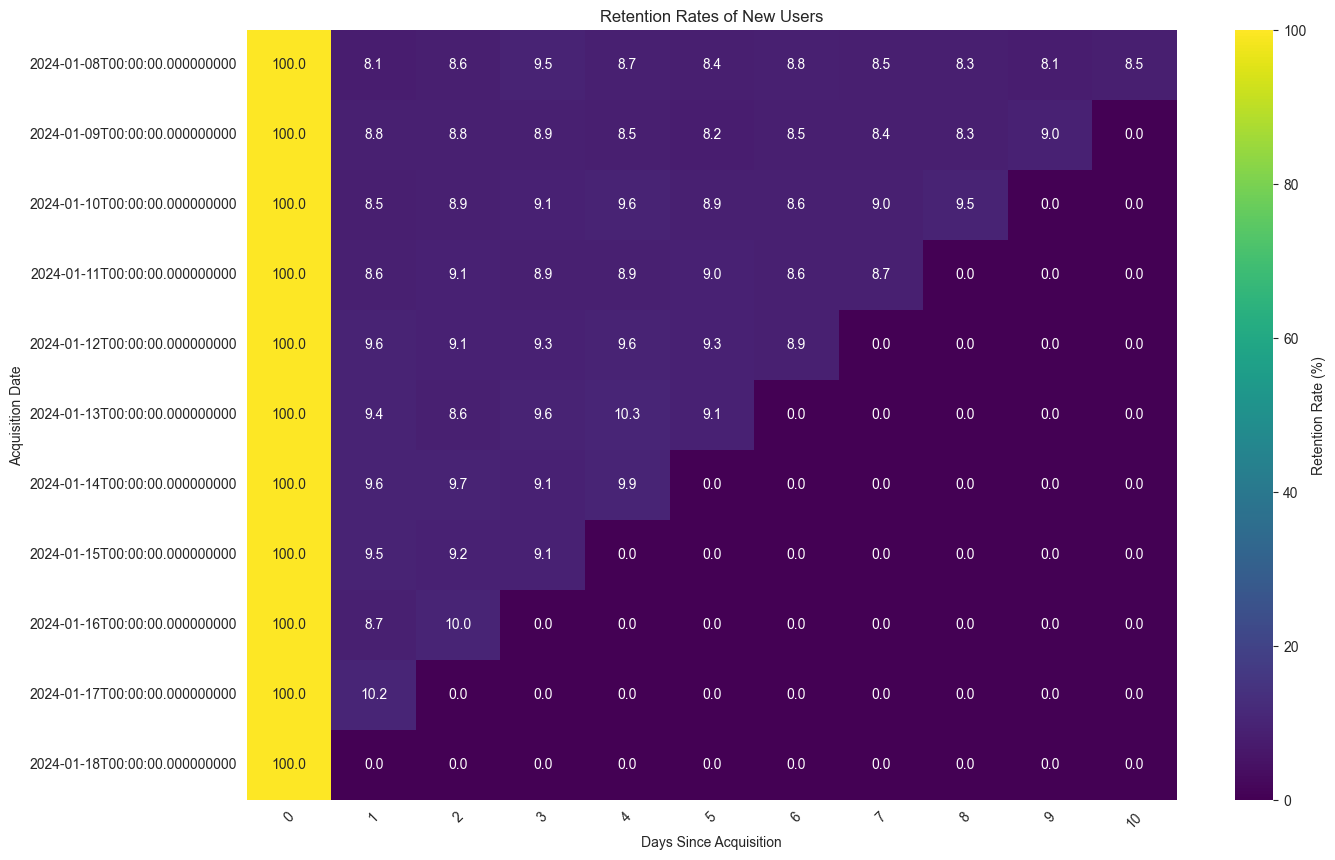

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Retention Rates of New Users')
plt.xlabel('Days Since Acquisition')
plt.ylabel('Acquisition Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [13]:
revenue_data = data[(data['behavior_type'] == 4)]
revenue_data = revenue_data.merge(first_occurrence, on='user_id')

In [14]:
daily_revenue = revenue_data.groupby('date')['ad_id'].count()

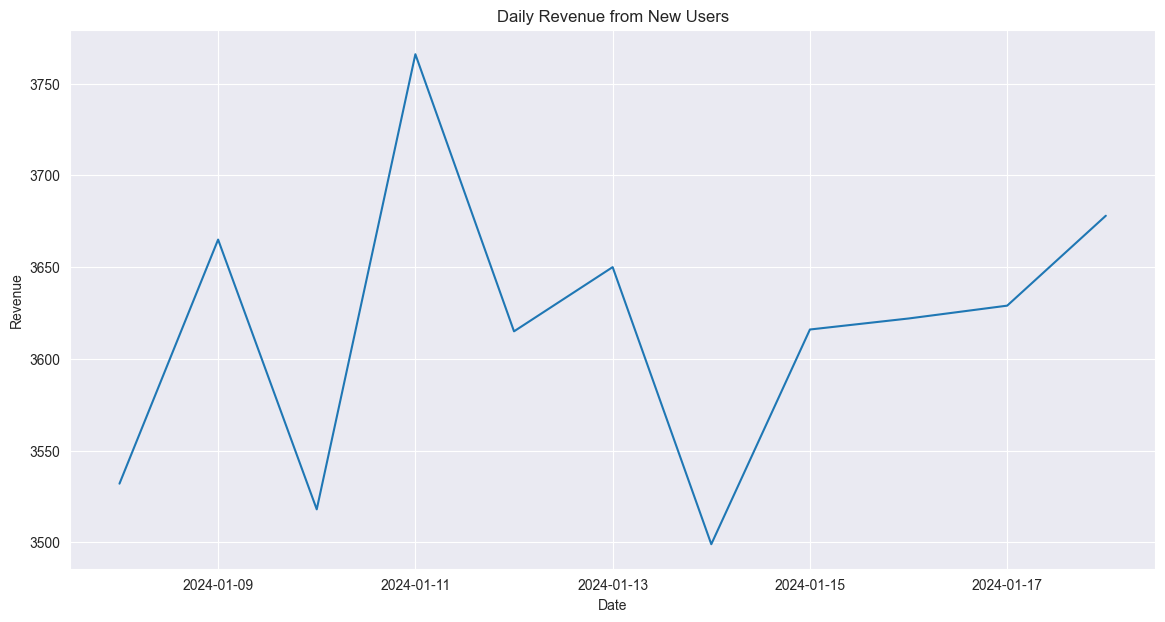

In [15]:
plt.figure(figsize=(14, 7))
daily_revenue.plot(kind='line')
plt.title('Daily Revenue from New Users')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [16]:
purchase_data = data[data['behavior_type'] == 4]
purchase_counts = purchase_data.groupby('user_id')['ad_id'].count().reset_index()
purchase_counts.columns = ['user_id', 'purchase_count']

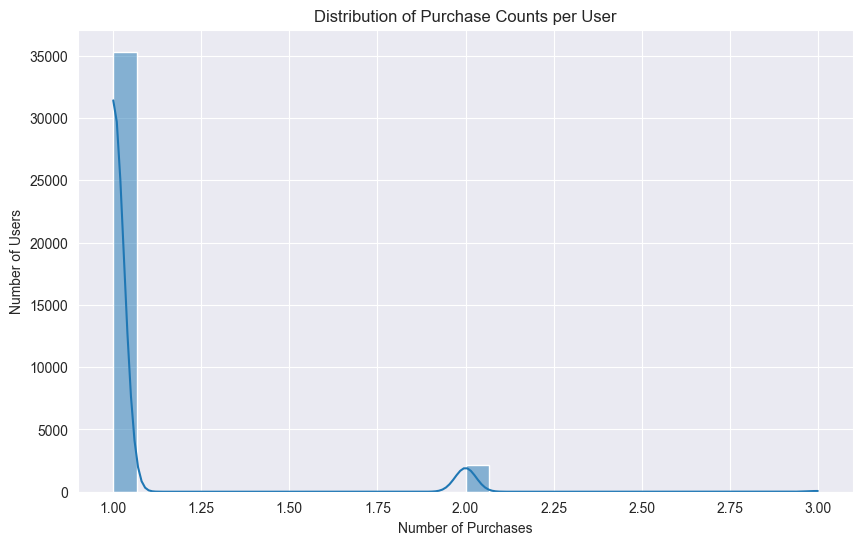

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(purchase_counts['purchase_count'], bins=30, kde=True)
plt.title('Distribution of Purchase Counts per User')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Users')
plt.show()

In [18]:
repurchase_data = data[data['behavior_type'] == 3]
repurchase_users = repurchase_data['user_id'].unique()
repurchase_counts = repurchase_data.groupby('user_id')['ad_id'].count().reset_index()
repurchase_counts.columns = ['user_id', 'repurchase_count']

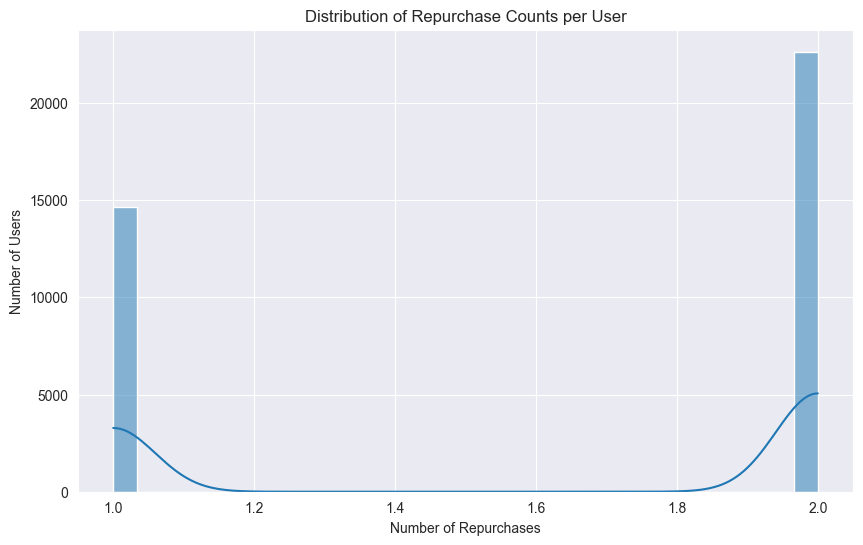

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(repurchase_counts['repurchase_count'], bins=30, kde=True)
plt.title('Distribution of Repurchase Counts per User')
plt.xlabel('Number of Repurchases')
plt.ylabel('Number of Users')
plt.show()